<a href="https://colab.research.google.com/github/namitha2306/ImageProcessingLab-Sem7/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LAB CYCLE 1

A. Image Negative
1. Implement the image negative transformation function and apply it to a grayscale image.
2. Analyze the effect of image negative on different types of images (e.g., low contrast, high
contrast).
3. Compare the histogram of an original image with its negative. Explain the observed
differences.


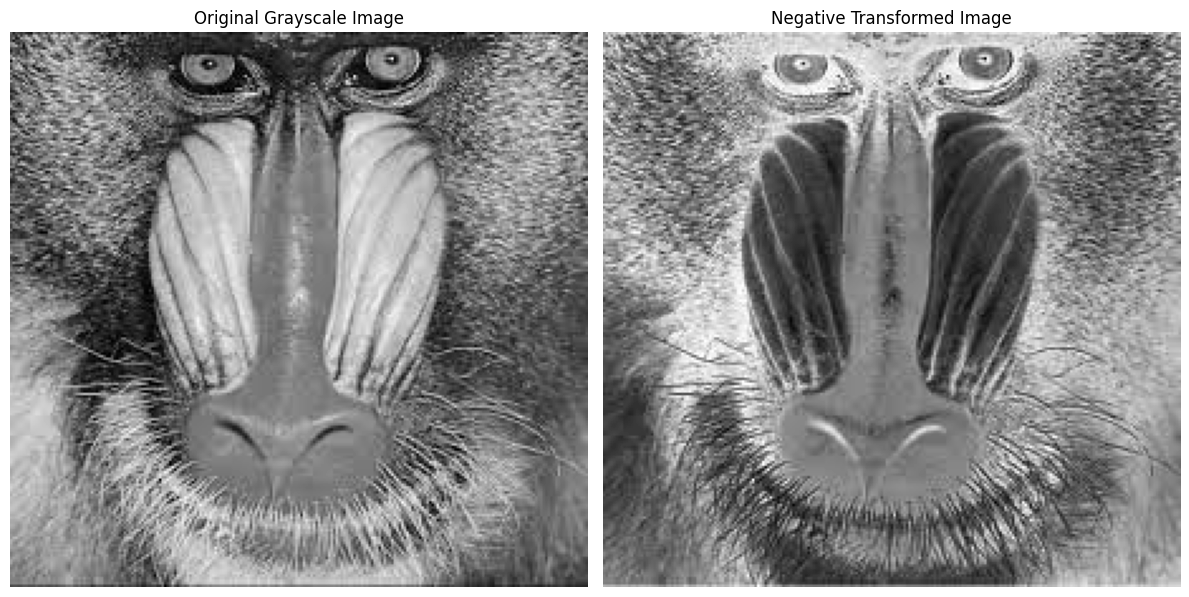

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the negative of an image
def apply_negative_transform(img):
    inverted_img = 255 - img
    return inverted_img

# Load the image in grayscale mode
input_image = cv2.imread("/content/drive/MyDrive/testimage.jpeg", cv2.IMREAD_GRAYSCALE)

# Perform the negative transformation
neg_image = apply_negative_transform(input_image)

# Plotting the original and negative images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')  # Hide axes for a cleaner display

plt.subplot(1, 2, 2)
plt.title('Negative Transformed Image')
plt.imshow(neg_image, cmap='gray')
plt.axis('off')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()


In [ ]:
input_image = cv2.imread('/content/drive/MyDrive/testimage2.jpeg', cv2.IMREAD_GRAYSCALE)
print(input_image)  # Check if the image is loaded properly


[[113 114 114 ... 165 165 165]
 [114 114 114 ... 165 165 165]
 [114 114 114 ... 166 166 166]
 ...
 [ 65  65  66 ... 190 190 190]
 [ 64  64  65 ... 202 202 202]
 [ 63  63  64 ... 212 212 212]]


B. Log Transformation
1. Implement the log transformation function and apply it to an image with a narrow range of
low gray-level values.
2. Analyze the effect of the log transformation on enhancing details in dark regions of an image.
3. Experiment with different values of the constant 'c' in the log transformation equation and
observe the changes in output image.

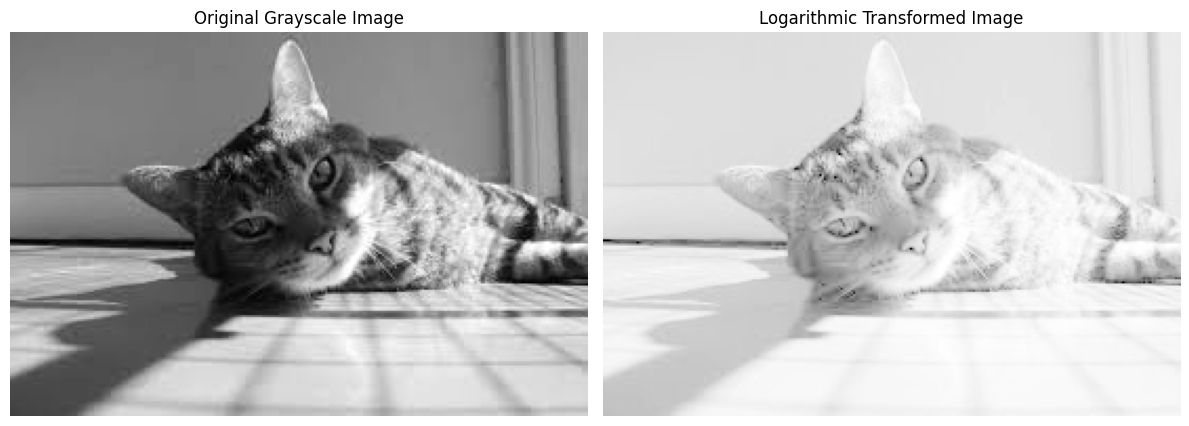

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply log transformation to an image
def apply_log_transform(img, scale_factor=1.0):
    # Convert image to float to avoid data loss
    float_img = np.float32(img)

    # Perform the logarithmic transformation
    transformed_img = scale_factor * np.log1p(float_img)  # log1p(x) computes log(1 + x)

    # Normalize the result to the 0-255 range, with error handling for divide by zero
    min_val, max_val = np.min(transformed_img), np.max(transformed_img)
    if max_val - min_val == 0:  # Avoid division by zero
        norm_log_img = np.zeros_like(transformed_img, dtype=np.uint8)
    else:
        norm_log_img = np.uint8(255 * (transformed_img - min_val) / (max_val - min_val))
    return norm_log_img

# Load the image in grayscale format
input_image = cv2.imread('/content/drive/MyDrive/testimage2.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if input_image is None:
    print("Error: Image not found or unable to load the image.")
else:
    # Apply log transformation with a higher scaling factor
    log_transformed_image = apply_log_transform(input_image, scale_factor=10.0)

    # Visualize the original and transformed images side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Grayscale Image')
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Logarithmic Transformed Image')
    plt.imshow(log_transformed_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()  # Adjusts layout to prevent overlapping
    plt.show()


C. Power-Law Transformation
1. Implement the power-law transformation function with different values of gamma.
2. Apply the power-law transformation to enhance images with different contrast characteristics.
3. Analyze the effect of gamma values on the image appearance, especially for values less than
and greater than 1.
4. Experiment with different image types (e.g., medical, satellite, natural) to observe the impact
of transformations.

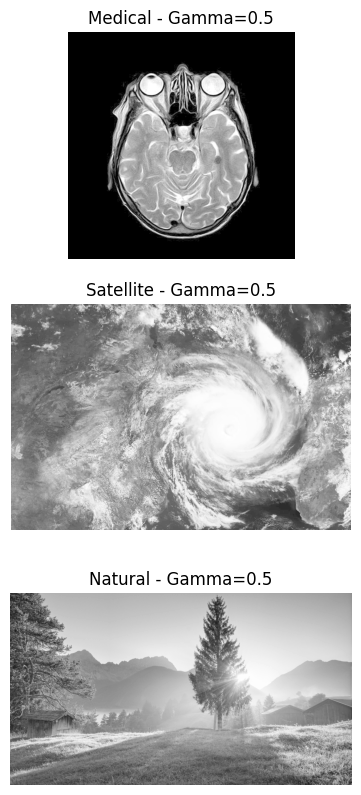

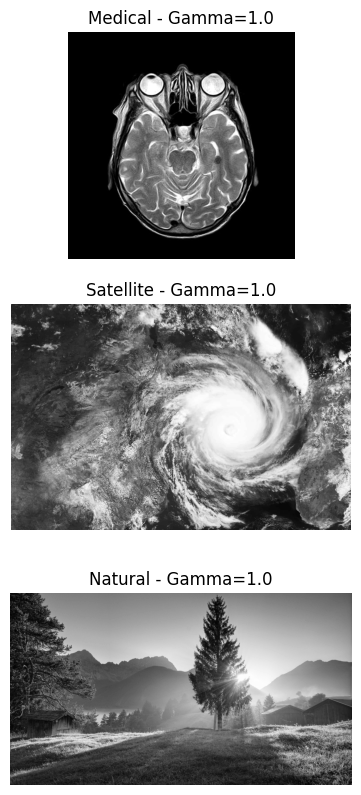

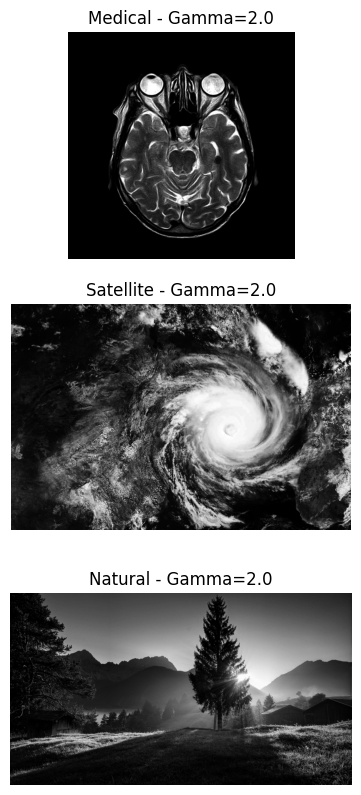

In [ ]:
def power_law_transformation(image, gamma=1.0, c=1.0):
    # Convert image to float32
    image_float = np.float32(image) / 255.0
    # Apply power-law transformation
    power_law_image = c * np.power(image_float, gamma)
    # Normalize to 0-255
    power_law_image = np.uint8(255 * power_law_image)
    return power_law_image

# Load different types of images
images = {
    'Medical': cv2.imread('/content/drive/MyDrive/data images/3.jpg', cv2.IMREAD_GRAYSCALE), # 'medical_image.jpg'
    'Satellite': cv2.imread('/content/drive/MyDrive/data images/4.jpg', cv2.IMREAD_GRAYSCALE), # 'satellite_image.jpg'
    'Natural': cv2.imread('/content/drive/MyDrive/data images/5.jpg', cv2.IMREAD_GRAYSCALE) # 'natural_image.jpg'
}

gammas = [0.5, 1.0, 2.0]

for gamma in gammas:
    plt.figure(figsize=(15, 10))
    for i, (title, image) in enumerate(images.items()):
        transformed_image = power_law_transformation(image, gamma)
        plt.subplot(len(images), len(gammas), i*len(gammas) + gammas.index(gamma) + 1)
        plt.title(f'{title} - Gamma={gamma}')
        plt.imshow(transformed_image, cmap='gray')
        plt.axis('off')

    plt.show()


D. Spatial Filtering
1. Implement mean, median, and Gaussian filters. Apply them to images with different noise
types (salt-and-pepper, Gaussian) and compare the results.
2. Design a custom filter for sharpening edges while preserving image details. Apply it to a
natural image and evaluate its performance.
3. Experiment with different Laplacian operators (4-connected, 8-connected) and compare their
edge detection capabilities.
E. Image Enhancement: Arithmetic/Logic Operations
4. Implement image subtraction to detect changes between two images (e.g., before and after an
event).
5. Create a simple image watermarking system using image addition and subtraction.
6. Experiment with image averaging to reduce noise in a sequence of images.

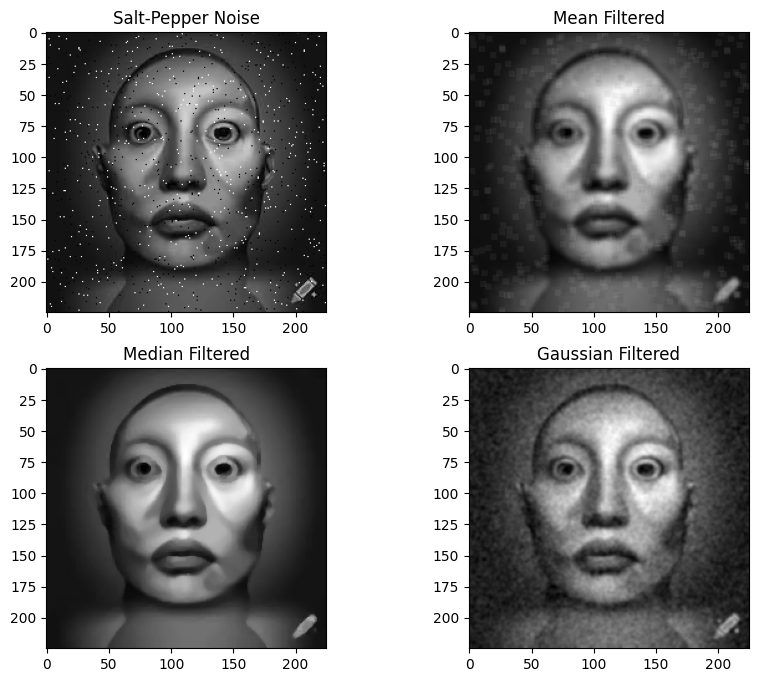

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/labtestimage.jpeg', 0)  # Load in grayscale

# Add noise to the image for testing
salt_pepper_noise = image.copy()
gaussian_noise = image.copy()

# Salt-and-pepper noise
salt_pepper_noise[np.random.randint(0, salt_pepper_noise.shape[0], 500),
                  np.random.randint(0, salt_pepper_noise.shape[1], 500)] = 255
salt_pepper_noise[np.random.randint(0, salt_pepper_noise.shape[0], 500),
                  np.random.randint(0, salt_pepper_noise.shape[1], 500)] = 0

# Gaussian noise
gaussian_noise = gaussian_noise + 0.5 * gaussian_noise.std() * np.random.randn(*gaussian_noise.shape)

# Apply Mean Filter
mean_filtered = cv2.blur(salt_pepper_noise, (5, 5))

# Apply Median Filter
median_filtered = cv2.medianBlur(salt_pepper_noise, 5)

# Apply Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(gaussian_noise, (5, 5), 0)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(221), plt.imshow(salt_pepper_noise, cmap='gray'), plt.title('Salt-Pepper Noise')
plt.subplot(222), plt.imshow(mean_filtered, cmap='gray'), plt.title('Mean Filtered')
plt.subplot(223), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.subplot(224), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filtered')
plt.show()


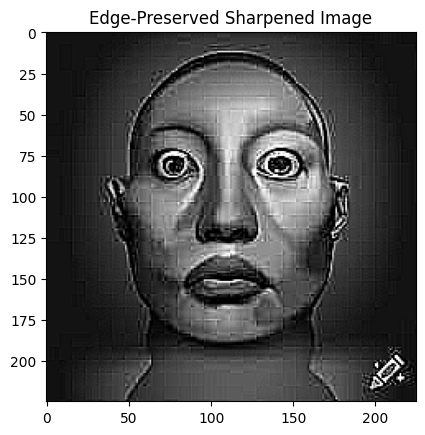

In [4]:
# Custom kernel for edge sharpening
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])

sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)

# Display result
plt.imshow(sharpened_image, cmap='gray')
plt.title('Edge-Preserved Sharpened Image')
plt.show()


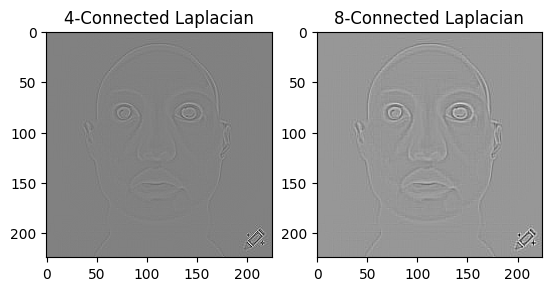

In [5]:
# Laplacian operators
laplacian_4 = cv2.Laplacian(image, cv2.CV_64F, ksize=1)  # 4-connected
laplacian_8 = cv2.Laplacian(image, cv2.CV_64F, ksize=3)  # 8-connected

# Display results
plt.subplot(121), plt.imshow(laplacian_4, cmap='gray'), plt.title('4-Connected Laplacian')
plt.subplot(122), plt.imshow(laplacian_8, cmap='gray'), plt.title('8-Connected Laplacian')
plt.show()


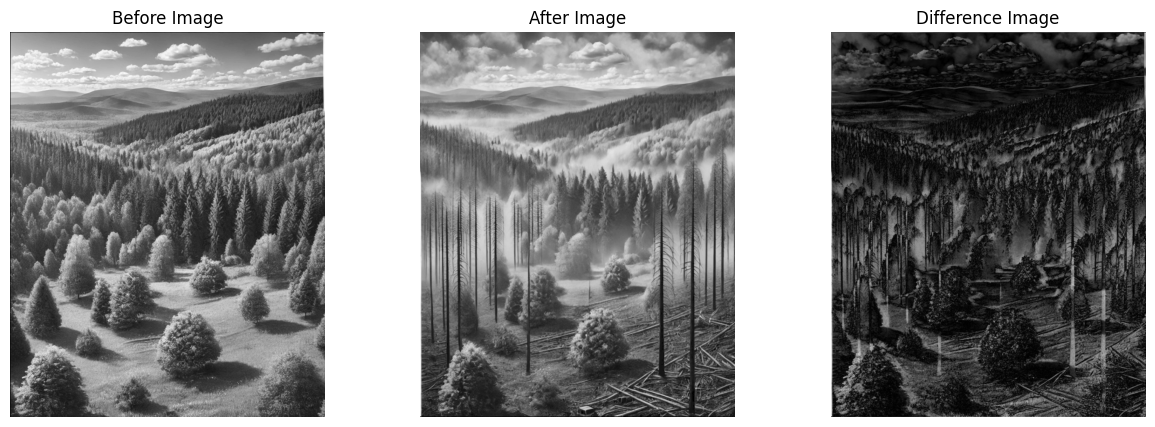

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
before = cv2.imread('/content/drive/MyDrive/Before.png', 0)
after = cv2.imread('/content/drive/MyDrive/After.png', 0)

# Resize images to the same size (if they are not already)
if before.shape != after.shape:
    after = cv2.resize(after, (before.shape[1], before.shape[0]))

# Subtract images
difference = cv2.absdiff(before, after)

# Display the result
plt.figure(figsize=(15, 5))

# Show Before image
plt.subplot(1, 3, 1)
plt.imshow(before, cmap='gray')
plt.title('Before Image')
plt.axis('off')

# Show After image
plt.subplot(1, 3, 2)
plt.imshow(after, cmap='gray')
plt.title('After Image')
plt.axis('off')

# Show Difference image
plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference Image')
plt.axis('off')

plt.show()


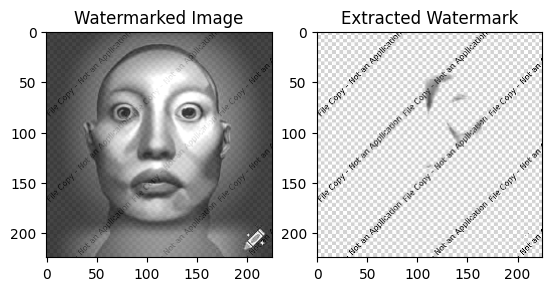

In [10]:
# Load images
image = cv2.imread('/content/drive/MyDrive/labtestimage.jpeg', 0)
watermark = cv2.imread('/content/drive/MyDrive/png-clipart-digital-watermarking-copyright-license-watermark-angle-white.png', 0)
watermark_resized = cv2.resize(watermark, (image.shape[1], image.shape[0]))

# Embed watermark
watermarked_image = cv2.addWeighted(image, 1, watermark_resized, 0.3, 0)

# Extract watermark
extracted_watermark = cv2.subtract(watermarked_image, image)

# Display results
plt.subplot(121), plt.imshow(watermarked_image, cmap='gray'), plt.title('Watermarked Image')
plt.subplot(122), plt.imshow(extracted_watermark, cmap='gray'), plt.title('Extracted Watermark')
plt.show()


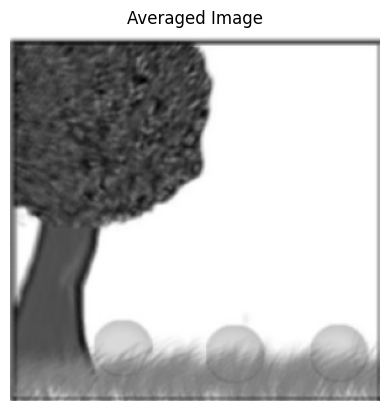

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the full paths for each image in the sequence
image_paths = [
    '/content/drive/MyDrive/img1.png',
    '/content/drive/MyDrive/img2.png',
    '/content/drive/MyDrive/img3.png'
]

# Load each image from the list of paths and resize them to a common size (e.g., 300x300)
common_size = (300, 300)
image_sequence = [cv2.resize(cv2.imread(path, 0), common_size) for path in image_paths]

# Average images
average_image = np.mean(image_sequence, axis=0).astype(np.uint8)

# Display result
plt.imshow(average_image, cmap='gray')
plt.title('Averaged Image')
plt.axis('off')
plt.show()


## Cycle 2

CYCLE 2
A. Image Transform
1. Perform Discrete Fourier Transform, Z- transform KL Transform on a gray scale image.
B. Intensity Transformation and Histogram Processing
1. Implement histogram equalization and matching on a grayscale image. Compare the results
visually and quantitatively using metrics like entropy.
2. Design a contrast enhancement technique for images with low contrast. Apply it to a realworld image and evaluate its effectiveness.
C. Frequency Domain Processing
1. Implement the 2D Discrete Fourier Transform (DFT) and its inverse.
2. Design low-pass, high-pass, and band-pass filters in the frequency domain. Apply them to an
image and analyze the results.
3. Implement homomorphic filtering and apply it to an image with uneven illumination.
D. Color Image Processing
1. Implement color space conversions between RGB, HSI, and YCbCr color models.
2. Perform color histogram equalization on a color image and analyze the results.
3. Implement color edge detection using Sobel or Canny operators.
4. Additional Practical Questions
5. Image Segmentation: Implement thresholding, region-based, and edge-based segmentation
techniques.
6. Image Morphological Processing: Perform erosion, dilation, opening, and closing operations
on binary images.
7. Image Registration: Implement image registration techniques for aligning multiple images.
Note: These questions are meant to provide a foundation for practical work in digital image
processing

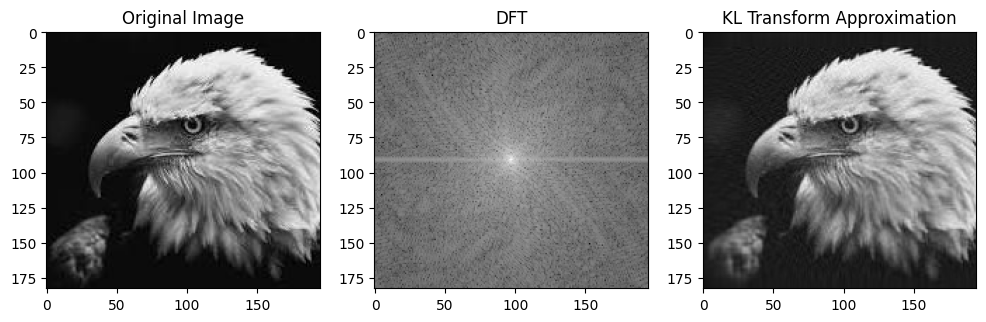

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from scipy.linalg import svd

# Load grayscale image
image = cv2.imread('/content/drive/MyDrive/Grayscaleimage.jpeg', 0)

# Discrete Fourier Transform (DFT)
dft = fft2(image)
dft_shifted = fftshift(dft)
magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)

# Z-Transform approximation (example using 2D DFT, as true Z-Transform is complex)
z_transform = fftshift(fft2(image))

# KL Transform (similar to PCA)
U, S, V = svd(image)

# Approximate image reconstruction using the top 50 singular values
num_components = 50
approx_image = np.dot(U[:, :num_components], np.dot(np.diag(S[:num_components]), V[:num_components, :]))

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('DFT')
plt.subplot(1, 3, 3), plt.imshow(approx_image, cmap='gray'), plt.title('KL Transform Approximation')
plt.show()


Histogram Equalization and Matching

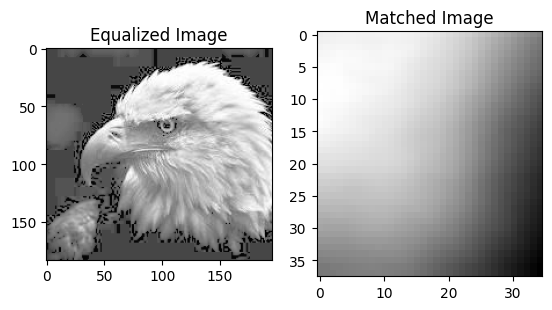

Entropy Original: 6.62309213785346 Entropy Equalized: 6.241113713578621


In [17]:
# Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Histogram Matching
reference_image = cv2.imread('/content/drive/MyDrive/testimage.jpeg', 0)
matched_image = cv2.matchTemplate(image, reference_image, cv2.TM_CCOEFF)

# Entropy calculation
from skimage.measure import shannon_entropy
entropy_original = shannon_entropy(image)
entropy_equalized = shannon_entropy(equalized_image)

# Display
plt.subplot(1, 2, 1), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.subplot(1, 2, 2), plt.imshow(matched_image, cmap='gray'), plt.title('Matched Image')
plt.show()
print("Entropy Original:", entropy_original, "Entropy Equalized:", entropy_equalized)


Contrast Enhancement

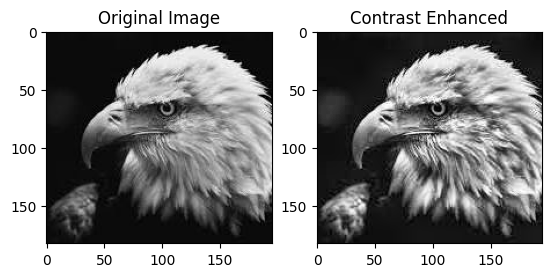

In [6]:
# Contrast Enhancement using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced = clahe.apply(image)

# Display
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(contrast_enhanced, cmap='gray'), plt.title('Contrast Enhanced')
plt.show()


2D DFT and Inverse DFT

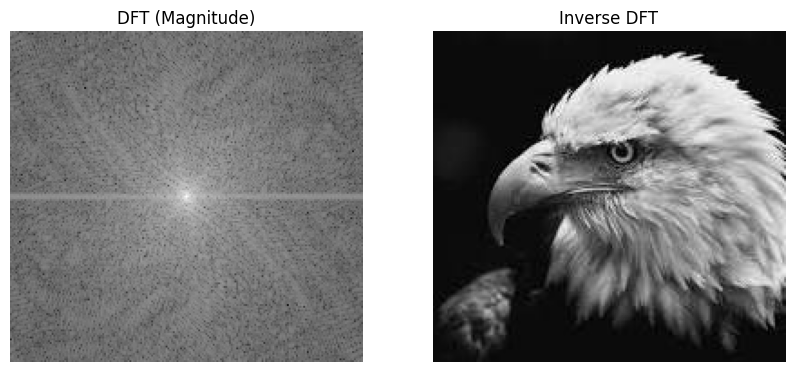

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# Assuming `image` is loaded
# Example: image = cv2.imread('/path/to/image.png', 0)  # Load in grayscale

# Forward DFT
dft = fft2(image)
dft_shifted = fftshift(dft)

# Inverse DFT
inverse_dft = ifft2(ifftshift(dft_shifted))

# Display the magnitude of DFT and Inverse DFT
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(dft_shifted) + 1), cmap='gray')
plt.title('DFT (Magnitude)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(inverse_dft), cmap='gray')
plt.title('Inverse DFT')
plt.axis('off')

plt.show()


Low-pass, High-pass, and Band-pass Filters

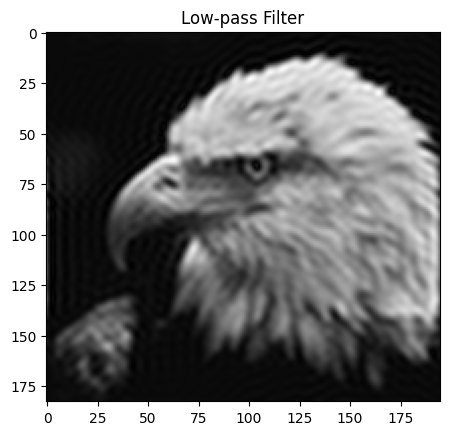

In [9]:
# Low-pass filter (Gaussian)
rows, cols = image.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
filtered_dft = dft_shifted * mask
filtered_image = np.abs(ifft2(ifftshift(filtered_dft)))

plt.imshow(filtered_image, cmap='gray'), plt.title('Low-pass Filter')
plt.show()


Homomorphic Filtering

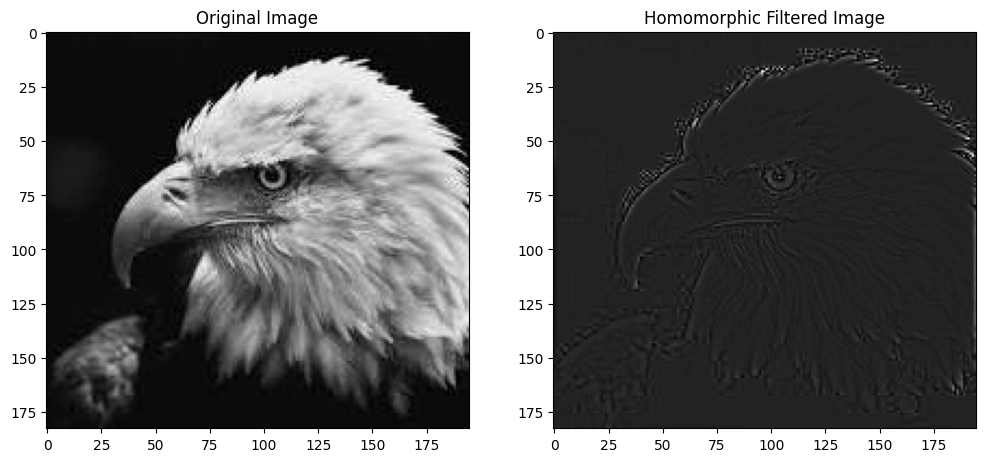

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Load grayscale image
image = cv2.imread('/content/drive/MyDrive/Grayscaleimage.jpeg', 0)

# Step 1: Convert image to log domain
log_image = np.log1p(np.array(image, dtype="float"))

# Step 2: Apply Fourier Transform
dft = fft2(log_image)
dft_shifted = fftshift(dft)

# Step 3: Create a high-pass filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2

# Parameters for high-pass filter
D0 = 30  # Cutoff frequency
H = np.ones((rows, cols), np.float32)
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - crow)**2 + (j - ccol)**2)
        H[i, j] = 1 - np.exp(- (D**2) / (2 * (D0**2)))

# Step 4: Apply the high-pass filter to the frequency-transformed image
filtered_dft = dft_shifted * H

# Step 5: Inverse Fourier Transform
filtered_dft_shifted = ifftshift(filtered_dft)
inverse_dft = ifft2(filtered_dft_shifted)
filtered_image = np.exp(np.real(inverse_dft)) - 1  # Back to original intensity range

# Step 6: Normalize the result
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
filtered_image = np.uint8(filtered_image)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(filtered_image, cmap='gray'), plt.title('Homomorphic Filtered Image')
plt.show()


Color Space Conversions (RGB, HSI, YCbCr)

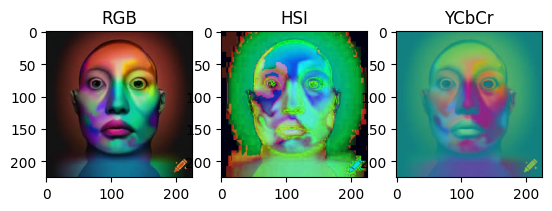

In [12]:
color_image = cv2.imread('/content/drive/MyDrive/labtestimage.jpeg')
hsi_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)
ycbcr_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)

plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)), plt.title('RGB')
plt.subplot(1, 3, 2), plt.imshow(hsi_image), plt.title('HSI')
plt.subplot(1, 3, 3), plt.imshow(ycbcr_image), plt.title('YCbCr')
plt.show()


Color Histogram Equalization

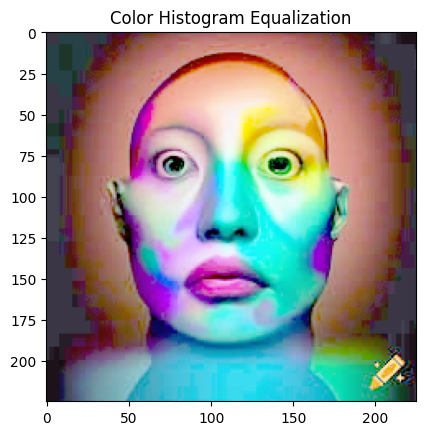

In [13]:
channels = cv2.split(color_image)
eq_channels = [cv2.equalizeHist(ch) for ch in channels]
color_eq = cv2.merge(eq_channels)

plt.imshow(cv2.cvtColor(color_eq, cv2.COLOR_BGR2RGB)), plt.title('Color Histogram Equalization')
plt.show()


Color Edge Detection

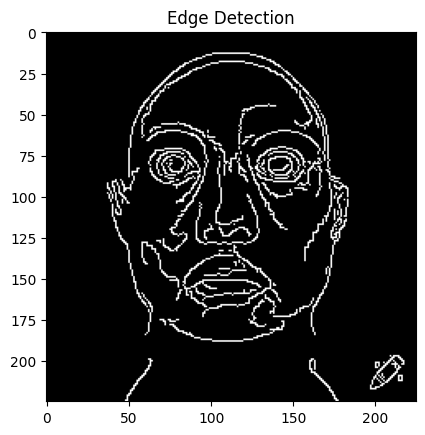

In [14]:
edges = cv2.Canny(color_image, 100, 200)
plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.show()


Image Segmentation Techniques

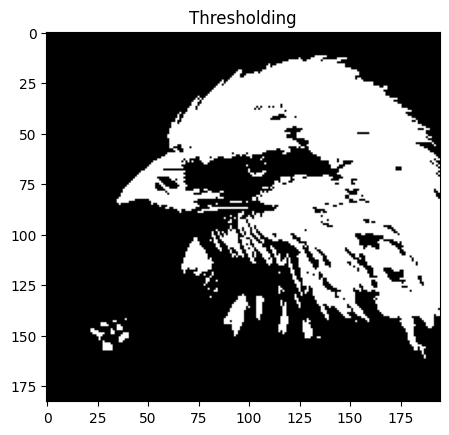

In [15]:
# Example of threshold-based segmentation
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray'), plt.title('Thresholding')
plt.show()


Image Morphological Processing

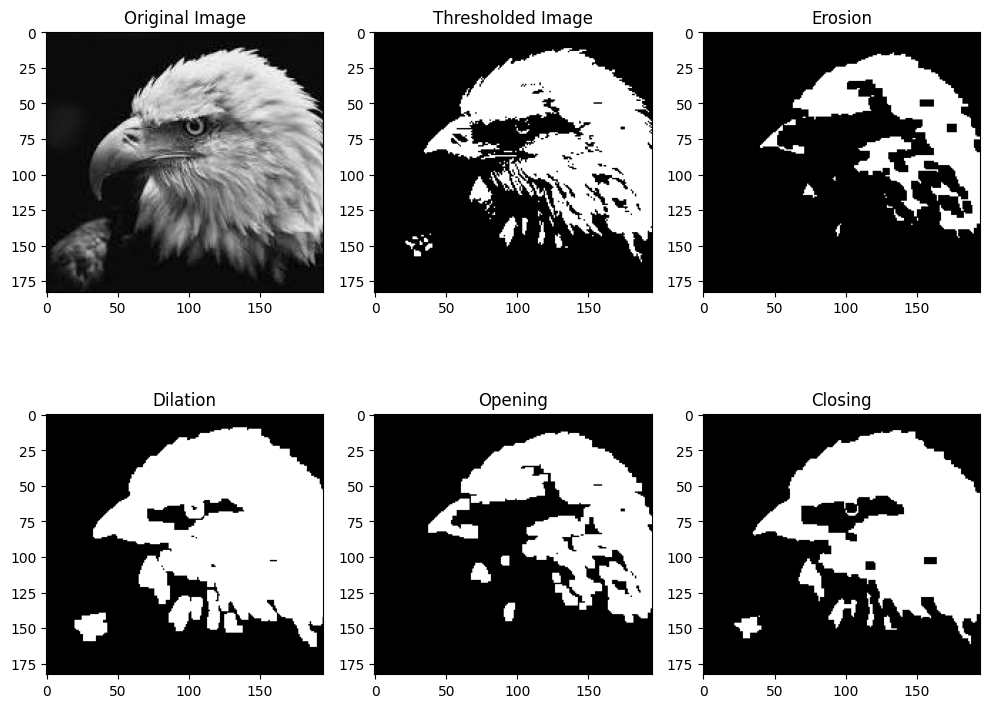

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image and apply thresholding
image = cv2.imread('/content/drive/MyDrive/Grayscaleimage.jpeg', 0)
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Perform morphological operations
erosion = cv2.erode(thresh, kernel, iterations=1)
dilation = cv2.dilate(thresh, kernel, iterations=1)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(thresh, cmap='gray'), plt.title('Thresholded Image')
plt.subplot(2, 3, 3), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
plt.subplot(2, 3, 4), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
plt.subplot(2, 3, 5), plt.imshow(opening, cmap='gray'), plt.title('Opening')
plt.subplot(2, 3, 6), plt.imshow(closing, cmap='gray'), plt.title('Closing')

plt.tight_layout()
plt.show()
